# Frekvencijski spektar
## Trapezni signal
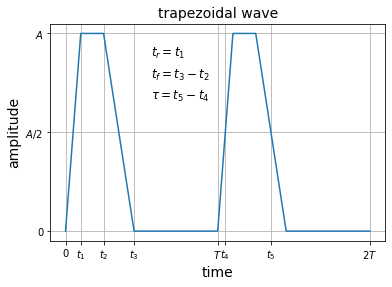

Komponente spektra uz $t_r=t_f$ računaju se prema sljedećim formulama (Paul 2006):

\begin{equation*}
c[0] = \frac{A\tau}{T}
\end{equation*}


\begin{equation*}
c[n] = \frac{2A\tau}{T}\left | \frac{\sin(n\pi\tau/T)}{n\pi\tau/T}\right | \left | \frac{\sin(n\pi t_r /T)}{n\pi t_r /T} \right |,
\end{equation*}
gdje c[0] predstavlja amplitudu DC komponente, c[1] amplitudu osnovne frekvencije, a npr. c[4] predstavlja amplitudu 4. harmonika frekvencijskog spektra. Ovojnica spektra trapeznog signala računa se prema formuli
\begin{equation*}
20\log(envelope)=20\log(\frac{2A\tau}{T}) + 20\log(\left | \frac{\sin(n\pi\tau/T)}{n\pi\tau/T}\right |) + 20\log(\left | \frac{\sin(n\pi t_r /T)}{n\pi t_r /T} \right |)
\end{equation*}
Ovojnica spektra trokutnog signala ima dvije kaakteristične frekvencije. Nakon prve karakteristične frekvencije $1/\pi \tau$), spektar opada s -20 dB/dek, a nakon druge karakteristične frekvencije $1/\pi t_r$ spektar opada s -40 dB/dek. 

## Trokutni signal
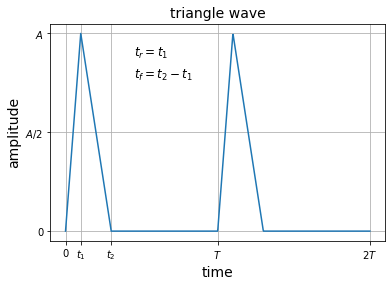
Spektar trokutnog signala dobije se kao poseban slučaj trapeznog, tj. kada je $\tau=t_r=t_f$. U izračunu se podešava samo vrijeme porasta $t_r$ (ne podešava se $\tau$). Ovojnica spektra trapeznog signala ima samo jednu karakterističnu frekvenciju $1/\pi t_r$) nakon koje spektar opada s -40 dB/dek. 

## Sinusni signal
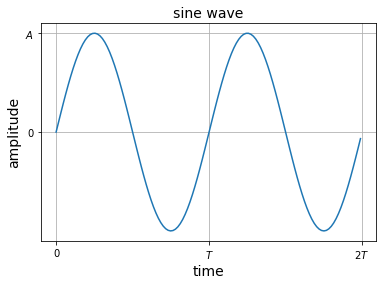
Spektar sinusnog signala sadrži samo komponentu osnovnog harmonika c[1]=$A$. Srednja vrijednost sinusnog signala prikazanog slikom jednaka je 0, pa je time c[0]=0.

In [2]:
def sine_spectra(A,T,unit):
    # calculation of spectra components
    c=[0 for i in range(2)]
    f=[0 for i in range(2)]
    f[0] = 0
    c[0] = 0     
    f[1] = 1/T
    c[1] = A     
    if (unit == '[V]'):
        return c,f
    elif (unit == '[dBmV]'):
        c[1] = 20*np.log10(c[1]/1e-3)      
        return c,f
    elif (unit == '[dBuV]'):
        c[1] = 20*np.log10(c[1]/1e-6)    
        return c,f

In [3]:
def trap_spectra(A,T,tau,tr,unit):
    # calculation of spectra components
    c=[0 for i in range(noC)]
    f=[0 for i in range(noC)]
    for n in range(noC):
        f[n] = (n)*1/T
        if (n == 0):
            c[n] = A*(tau/T)
        else:
            sinx_x1 = np.sin((n)*np.pi*tau/T)/((n)*np.pi*tau/T)
            sinx_x2 = np.sin((n)*np.pi*tr/T)/((n)*np.pi*tr/T)
            c[n] = 2*A*(tau/T)*np.abs(sinx_x1)*np.abs(sinx_x2)
                    
    if (unit == '[V]'):
        return c,f
    elif (unit == '[dBmV]'):
        for n in range(len(c)):
            c[n] = 20*np.log10(c[n]/1e-3)
            if c[n] < 0:
                c[n] = 0        
        return c,f
    elif (unit == '[dBuV]'):
        for n in range(len(c)):
            c[n] = 20*np.log10(c[n]/1e-6)
            if c[n] < 0:
                c[n] = 0                
        return c,f

def envelope_trap_spectra(A,T,tau,tr,unit,fmin,fmax):    
    # from fmin to 1/(pi*tau)
    temp1 = np.linspace(fmin, 1/(np.pi*tau), num=100)
    temp2 = np.empty((0, 100))   
    for i in range(len(temp1)):
        temp2 = np.append(temp2, 2*A*tau/T) 
        
    fx = temp1    
    envelope = temp2
    
    # from 1/(pi*tau) to 1/(pi*tr)
    temp1 = np.linspace(1/(np.pi*tau), 1/(np.pi*tr), num=100)
    temp2 = np.empty((0, 100))
    for i in range(len(temp1)):
        temp2 = np.append(temp2, 20*np.log10(envelope[-1])-np.log10(temp1[i]/temp1[0])*20)
        
    fx = np.append(fx,temp1)
    envelope = np.append(envelope,10**(temp2/20))

    # from 1/(pi*tr) to fmax
    temp1 = np.linspace(1/(np.pi*tr), fmax, num=100)
    temp2 = np.empty((0, 100))
    for i in range(len(temp1)):
        temp2 = np.append(temp2, 20*np.log10(envelope[-1])-np.log10(temp1[i]/temp1[0])*40)    
        
    fx = np.append(fx,temp1)
    envelope = np.append(envelope,10**(temp2/20))
          
    if (unit == '[V]'):
        return envelope,fx
    elif (unit == '[dBmV]'):
        return 20*np.log10(np.asarray(envelope)/1e-3),np.asarray(fx)
    elif (unit == '[dBuV]'):
        return 20*np.log10(np.asarray(envelope)/1e-6),np.asarray(fx)

In [4]:
def isotriangle_spectra(A,T,tr,unit):
    # calculation of spectra components
    c=[0 for i in range(noC)]
    f=[0 for i in range(noC)]
    for n in range(noC):
        f[n] = (n)*1/T
        if (n == 0):
            c[n] = 0.5*A
        else:
            nom1 = np.sin((n)*np.pi*tr/T)
            den1 = (n)*np.pi*tr/T
            c[n] = 2*A*(tr/T)*np.abs(nom1/den1)**2                 
                    
    if (unit == '[V]'):
        return c,f
    elif (unit == '[dBmV]'):
        for n in range(len(c)):
            c[n] = 20*np.log10(c[n]/1e-3)
            if c[n] < 0:
                c[n] = 0        
        return c,f
    elif (unit == '[dBuV]'):
        for n in range(len(c)):
            c[n] = 20*np.log10(c[n]/1e-6)
            if c[n] < 0:
                c[n] = 0                
        return c,f
    
def envelope_isotriangle_spectra(A,T,tr,unit,fmin,fmax):    
    # from fmin to 1/(pi*tr)
    temp1 = np.linspace(fmin, 1/(np.pi*tr), num=100)
    temp2 = np.empty((0, 100))   
    for i in range(len(temp1)):
        nom1 = np.sin(np.pi*tr/T)
        den1 = np.pi*tr/T
        c = 2*A*(tr/T)*np.abs(nom1/den1)**2        
        temp2 = np.append(temp2, c) 
        
    fx = temp1    
    envelope = temp2
    
    # from 1/(pi*tr) to fmax
    temp1 = np.linspace(1/(np.pi*tr), fmax, num=100)
    temp2 = np.empty((0, 100))
    for i in range(len(temp1)):
        temp2 = np.append(temp2, 20*np.log10(envelope[-1])-np.log10(temp1[i]/temp1[0])*40)    
        
    fx = np.append(fx,temp1)
    envelope = np.append(envelope,10**(temp2/20))
          
    if (unit == '[V]'):
        return envelope,fx
    elif (unit == '[dBmV]'):
        return 20*np.log10(np.asarray(envelope)/1e-3),np.asarray(fx)   
    elif (unit == '[dBuV]'):
        return 20*np.log10(np.asarray(envelope)/1e-6),np.asarray(fx)    

In [5]:
%matplotlib inline
from ipywidgets import widgets
from ipywidgets import Layout
import numpy as np
import matplotlib.pyplot as plt

# no of spectra coefficients
noC = 100
coeffno = 0

style = {'description_width': '150px'}
fmin = widgets.FloatLogSlider(min=1, max=6, step=1, value=1e6,description='$f_{min}$ [Hz]:',style=style,layout=Layout(width='75%'), continuous_update=False)
fmax = widgets.FloatLogSlider(min=7, max=10, step=1, value=1e9,description='$f_{max}$ [Hz]:',style=style,layout=Layout(width='75%'), continuous_update=False)
ymin = widgets.IntSlider(min=0,max=100, step=1, value=0,description='plot $y_{min}$:',readout_format='.4f',style=style,layout=Layout(width='75%'), continuous_update=False)
ymax = widgets.IntSlider(min=1,max=200, step=1, value=160,description='plot $y_{max}$:',readout_format='.1f',style=style,layout=Layout(width='75%'), continuous_update=False)
bunit = widgets.ToggleButtons(options=['[dBuV]', '[dBmV]', '[V]'], description='Unit:',disabled=False,button_style='',style=style,layout=Layout(width='75%'), continuous_update=False)

sA = widgets.FloatSlider(min=1, max=100, step=1, value=1,description='A [V]:',style=style,layout=Layout(width='75%'), continuous_update=False)
tA = widgets.Text(value='1',placeholder='',description='',style=style,layout=Layout(width='15%'), continuous_update=False)
mylink = widgets.jslink((sA, 'value'), (tA, 'value'))

sT = widgets.FloatSlider(min=0.01, max=1, step=0.01, value=0.2,description='T [usec]:',style=style,layout=Layout(width='75%'), continuous_update=False)
tT = widgets.Text(value='0.2',placeholder='',description='',style=style,layout=Layout(width='15%'), continuous_update=False)
mylink = widgets.jslink((sT, 'value'), (tT, 'value'))

stau = widgets.FloatSlider(min=0.001,max=1,step=0.01, value=0.1,description='$\\tau$ [usec]:',style=style,layout=Layout(width='75%'), continuous_update=False)
ttau = widgets.Text(value='0.1',placeholder='',description='',style=style,layout=Layout(width='15%'), continuous_update=False)
mylink = widgets.jslink((stau, 'value'), (ttau, 'value'))

sstr = widgets.FloatSlider(min=0.001,max=100,step=0.01, value=1,description='$t_r$ [nsec]:',style=style,layout=Layout(width='75%'), continuous_update=False)
tstr= widgets.Text(value='1',placeholder='',description='',style=style,layout=Layout(width='15%'), continuous_update=False)
mylink = widgets.jslink((sstr, 'value'), (tstr, 'value'))

scoeff = widgets.IntSlider(value=0,min=0,max=noC-1,step=1,description='coeff. no.:',style=style,layout=Layout(width='75%'), continuous_update=False)

tcoeff = widgets.Text(value='',placeholder='-',description='coeff. value:',style=style,layout=Layout(width='75%'))
twarn = widgets.Text(value='',placeholder='-',description='msg:',style=style,layout=Layout(width='75%'))

option1 = 'sine signal'
option2 = 'trapezoidal signal'
option3 = 'triangle signal'
rb = widgets.RadioButtons(options=[option1,option2,option3], description='',style=style,layout=Layout(width='75%'))

def f(fmin, fmax, ymin, ymax, unit, A, T, tau, tr, rb, coeff, t1, t2):
     

    fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
    plt.rcParams.update({'font.size': 18})      
    axes = plt.gca()                       
    axes.set_xscale("log")
    axes.set_yscale("linear") 
        
    plt.grid(True,which="both",ls=":")
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Spectrum '+unit)    
    plt.ylim(bottom = ymin, top = ymax)  
    plt.xlim(left = fmin, right = fmax)          
                
    T = T/1e6
    tau = tau/1e6
    tr = tr/1e9            
    
    if (rb == option2):
        title_txt = 'Trapezodial signal spectrum'    
        plt.title(title_txt)
        c,f1 = trap_spectra(A,T,tau,tr,unit)          
        envelope,f2 = envelope_trap_spectra(A,T,tau,tr,unit,fmin,fmax)        
        if (T < tau + tr):                
            twarn.value = 'T < tau + tr !!!'
        else:
            twarn.value = 'parameters ok!!!!' + '; f1 = '+"{0:.2f}".format(1e-6/(np.pi*tau))+' MHz' + '; f2 = '+"{0:.2f}".format(1e-6/(np.pi*tr))+' MHz'                                        
        markerline, stemlines, baseline = axes.stem(f1, c, '-.',label='exact',use_line_collection=True)
        axes.plot(f2, envelope, lw=2, color='blue',label='envelope')         
    elif (rb == option3):
        title_txt = 'Triangle signal spectrum'
        plt.title(title_txt)
        c,f1 = isotriangle_spectra(A,T,tr,unit)  
        envelope,f2 = envelope_isotriangle_spectra(A,T,tr,unit,fmin,fmax)        
        if (T < 2*tr):                
            twarn.value = 'T < 2*tr !!!'
        else:
            twarn.value = 'parameters ok!!!!' + '; f2 = '+"{0:.2f}".format(1e-6/(np.pi*tr))+' MHz'        
        markerline, stemlines, baseline = axes.stem(f1, c, '-.',label='exact',use_line_collection=True)
        axes.plot(f2, envelope, lw=2, color='blue',label='envelope')                     
    elif (rb == option1):
        title_txt = 'Sine signal spectrum'
        plt.title(title_txt)
        c,f1 = sine_spectra(A,T,unit)         
        twarn.value = 'parameters ok!!!!'               
        markerline, stemlines, baseline = axes.stem(f1, c, '-.',label='exact',use_line_collection=True)
        if (coeff > 1):
            coeff = 1
        
    tcoeff.value = 'c['+str(int(coeff))+'] = '+"{0:.2f}".format(c[int(coeff)])+unit+' @ '+"{0:.2f}".format(1e-6*(coeff)/T)+' MHz'                    
            
    plt.setp(baseline, color='r', linewidth=0)
    plt.setp(stemlines, color='r', linewidth=1)
    plt.setp(markerline, color='r', linewidth=2)   
    
    leg = axes.legend()
    
out = widgets.interactive_output(f, 
                                 {'fmin': fmin, 'fmax': fmax, 'ymin': ymin, 'ymax': ymax, 'unit':bunit, 
                                  'A': sA, 'T': sT, 'tau': stau, 'tr': sstr, 'rb' : rb, 'coeff': scoeff, 't1': tcoeff, 't2': twarn})

tab1 = widgets.VBox(children=[fmin,fmax, ymin, ymax, bunit])
tab2 = widgets.VBox(children=[widgets.HBox(children=[sA,tA]),widgets.HBox(children=[sT,tT]),widgets.HBox(children=[stau,ttau]),widgets.HBox(children=[sstr,tstr]),rb,scoeff,tcoeff,twarn])

tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'plot')
tab.set_title(1, 'signal parameters')

widgets.VBox([tab, out])